# Integración numérica ("cuadratura")

A menudo en la física, es necesario evaluar integrales feas. [La verdad es que casi todas las integrales son feas...] Mientras que la diferenciación es un proceso que se puede llevar a cabo de manera algorítmica, siguiendo una receta, la integración no lo es. De hecho, se puede demostrar que hay integrales que no se pueden llevar a cabo de forma analítica en términos de las funciones elementales; un ejemplo famoso, y de suma importancia, es la llamada [función error](https://es.wikipedia.org/wiki/Funci%C3%B3n_error), dada por

$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^x e^{-t^2} \, dt,$$

la cual está estrechamente relacionada con la probabilidad de eventos para una variable aleatoria distribuida de forma normal (gaussiana).

Por lo tanto, necesitamos encontrar maneras de aproximar integrales definidas, de forma numérica.

Recordemos que la integral 

$$I(f) = \int_a^b f(x) \, dx$$ 

representa el **área debajo de la curva $y=f(x)$ entre $x=a$ y $x=b$**. Por lo tanto, la integración numérica también se llama "cuadratura numérica". [Ver, por ejemplo, https://es.wikipedia.org/wiki/Cuadratura_del_c%C3%ADrculo.] Por lo tanto, da una manera de aproximar numéricamente una **integral de Riemann**.

Nota que la integral $I(f)$ es una función [de hecho, un "funcional"] **lineal** de $f$. Por lo tanto, buscaremos métodos numéricos con la misma propiedad. Siguiendo la pista que vimos en el notebook sobre la interpolación, pensamos en **discretizar** (por supuesto). Una forma de hacerlo es evaluar la función $f$ en $N+1$ **nodos** $x_j$, y buscaremos **pesos** $\alpha_i$ que den una aproximación a la integral de la forma

$$Q(f) = \sum_{i=0}^N \alpha_j \, f(x_j), \qquad  (*)$$

es decir como una suma ponderada de los valores de la función en los nodos.

#### Ejercicio 1

Un caso particular es una $f$ que sea **monótona**, por ejemplo el integrando $f$ que aparece en la función $\mathrm{erf}$, dado por $f(x) = e^{-x^2/2}$. 

(i) La idea más natural [pero ¡no necesariamente mejor!] es dividir el intervalo $[0, x]$ en $N$ intervalos iguales de longitud $h=1/N$. Dada una $x$ y una $N$, dibuja la función, así como líneas verticales punteadas [dibujar con `linestyle=:dash`] en los nodos.
Grafícalo.

(ii) La idea más sencilla es aproximar la función $f$ en un intervalo dado con una recta horizontal. 
¿Cómo podríamos calcular tanto una cota inferior como una cota superior, suponiendo que $f$ es monótona? Exprésalos en la forma de la ecuación (*). Grafícalos.

Escribe una función que calcule estas áreas dadas $f$ (monótona), $a$, $b$ y $N$.

(iii) ¿Cuál es la tasa de convergencia hacia el resultado exacto cuando $N \to \infty$ para $f(x) = e^{-x^2/2}$? [Pista: La función $\mathrm{erf}$ en Julia se llama... `erf`. Se encuentra en el paquete `SpecialFunctions.jl`.]

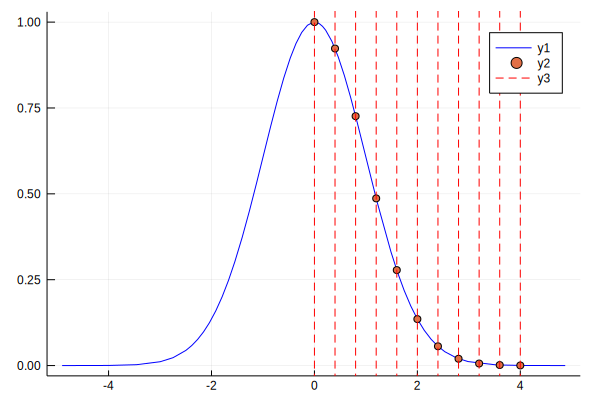

In [732]:
#(i)
using SymPy
using Plots
x=Sym("x")
f(x)=exp(-(x^2)/2)
function div(x,N)
    A=[]
    C=[]
    T=[]
    T1=[]
    h=x/N
    a=0
    for i in range(0,N+1)
        push!(C,f(a))
        push!(A,a)
        push!(T,a+h-h/2)
        push!(T1,max(f(a),f(a+h)))
        a=a+h
    end
    return A,C,T,T1
end
A,C,T,T1=div(4,10) #funcion del 0 al 4, en 10 intervalos
plot(f(x),color="blue")
scatter!(A,C)
#scatter!(T,T1,marker=:hline,markersize=10,markercolor="green")
vline!(A,linestyle=:dash,color="red")

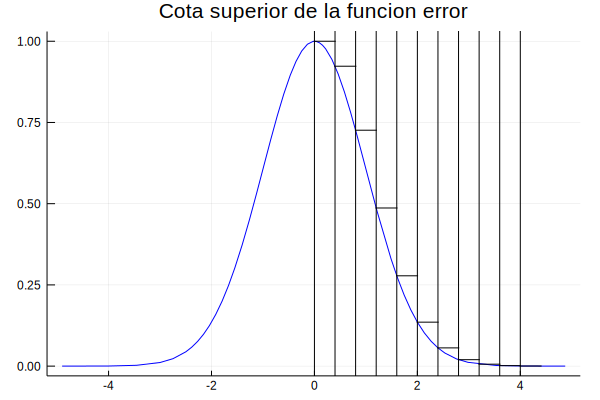

In [733]:
#(ii)
using SymPy
using Plots
x=Sym("x")
f(x)=exp(-(x^2)/2)
function div(x,N)
    A=[]
    C=[]
    T=[]
    T1=[]
    h=x/N
    a=0
    for i in range(0,N+1)
        push!(C,f(a))
        push!(A,a)
        push!(T,a+h-h/2)
        push!(T1,max(f(a),f(a+h)))
        a=a+h
    end
    return A,C,T,T1
end
A,C,T,T1=div(4,10) #funcion del 0 al 4, en 10 intervalos
plot(f(x),color="blue",title="Cota superior de la funcion error",legend=false)
#scatter!(A,C)
scatter!(T,T1,marker=:hline,markersize=10)
vline!(A,linestyle=:solid,color="black")

La cota superior es la suma de los rectangulos.

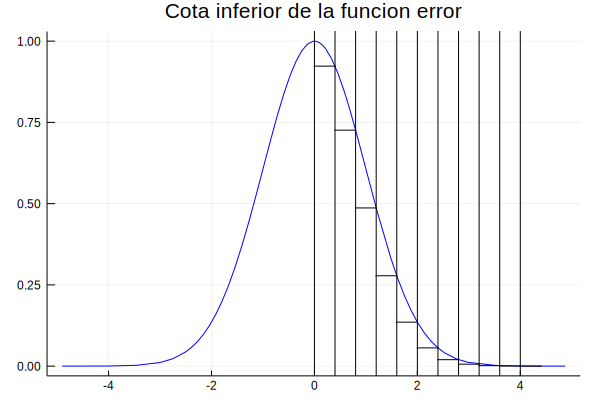

In [734]:
#(ii)
using SymPy
using Plots
x=Sym("x")
f(x)=exp(-(x^2)/2)
function div(x,N)
    A=[]
    C=[]
    T=[]
    T1=[]
    h=x/N
    a=0
    for i in range(0,N+1)
        push!(C,f(a))
        push!(A,a)
        push!(T,a+h-h/2)
        push!(T1,min(f(a),f(a+h)))
        a=a+h
    end
    return A,C,T,T1
end
A,C,T,T1=div(4,10) #funcion del 0 al 4, en 10 intervalos
plot(f(x),color="blue",title="Cota inferior de la funcion error",legend=false)
#scatter!(A,C)
scatter!(T,T1,marker=:hline,markersize=10)
vline!(A,linestyle=:solid,color="black")

La cota inferior de la integral es la suma de los rectangulos. 

Recordemos que la funcion con la que estamos tratando es monotona decreciene, entonces las cotas superior e inferior estan dadas por, $$Q_{sup}(f) = \sum_{j=0}^{N+1} \frac{b-a}{n} \, f(x_j), \qquad  (*)$$  $$Q_{inf}(f) = \sum_{j=0}^{N} \frac{b-a}{n} \, f(x_{j+1}), \qquad  (*)$$

In [735]:
#(ii)
function sumasup(f,a,b,n)
    α=(b-a)/n
    s=0
    for i in range(0,n+1)
        s=s+α*f(a+(i*α))
    end
    return s
end
g(x)=x
sumasup(g,0,2,10)

2.2

In [736]:
#(ii)
function sumainf(f,a,b,n)
    α=(b-a)/n
    s=0
    for i in range(1,n-1)
        s=s+α*f(a+(i*α))
    end
    return s
end
g(x)=x
sumainf(g,0,2,10)

1.8000000000000003

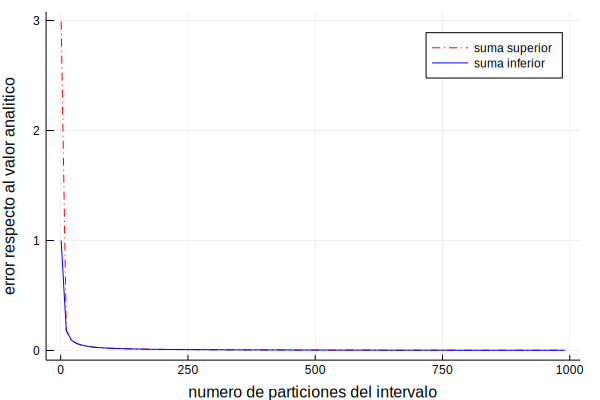

In [737]:
#(iii)
using SpecialFunctions
erf(5)
BT=[]
BU=[]
BV=[]
for i in 1:10:1000
    d=abs(erf(5)-sumasup(f,0,5,i)*(2/sqrt(2*pi)))
    d2=abs(erf(5)-sumainf(f,0,5,i)*(2/sqrt(2*pi)))
    push!(BT,d)
    push!(BU,i)
    push!(BV,d2)
end
plot(BU,BT,linestyle=:dashdot,color="red",label="suma superior",xlabel="numero de particiones del intervalo")
plot!(BU,BV,linestyle=:solid,color="blue",label="suma inferior",ylabel="error respecto al valor analitico")

Observamos que cuando $N\rightarrow \infty$, el error del metodo se aproxima asintoticamente a $0$.

#### Ejercicio 2

(i) Dibuja las cotas inferior y superior para $\mathrm{erf}(x)$, como función de $x$.

(ii) Encuentra una cota superior analítica para $\int_{t=x}^\infty e^{-t^2/2} dt$. [Pista: puedes utilizar, por ejemplo, $f(t) \le e^{-t}$ para $t$ suficientemente grande. [¿Qué tan grande?].] 

(iii) Así, encuentra cotas para $\lim_{x \to \infty} \mathrm{erf}(x)$. ¿Cuál valor analítica tiene? Así, podemos encontrar cotas para integrales con rango infinito.

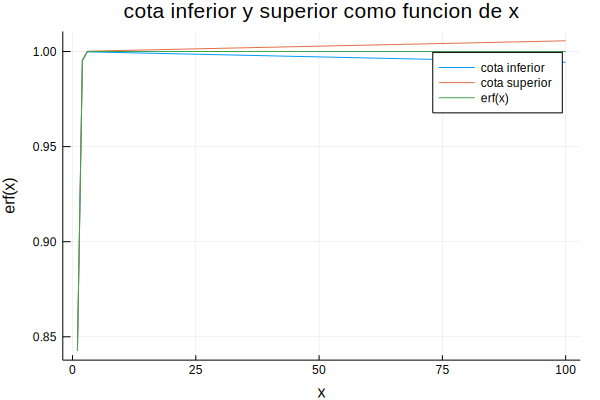

In [738]:
#(i)
A1=[]
A2=[]
A3=[]
A4=[]
ff(t)=2/sqrt(pi)*e^(-t^2)
for i in range(1,100)
    d=sumainf(ff,0,i,10000)
    d2=sumasup(ff,0,i,10000)
    d3=erf(i)
    push!(A1,d)
    push!(A2,d2)
    push!(A3,i)
    push!(A4,d3)
end
plot(A3,A1,xlabel="x",ylabel="erf(x)",title="cota inferior y superior como funcion de x",label="cota inferior")
plot!(A3,A2,label="cota superior")
plot!(A3,A4,label="erf(x)")

Observamos que nuestro metodo no es muy efectivo para valores de $x$ muy grandes. 

In [739]:
#(ii)

Dado que $e^{-x^2} \le e^{-x}$ para cualquier $x>1 $ (ver la grafica del siguiente bloque) entonces, $\int_{t}^\infty e^{x^2} \le \int_{t}^\infty e^{-x} =-e^{-x}\bracevert_{t}^\infty=e^{-t}.$

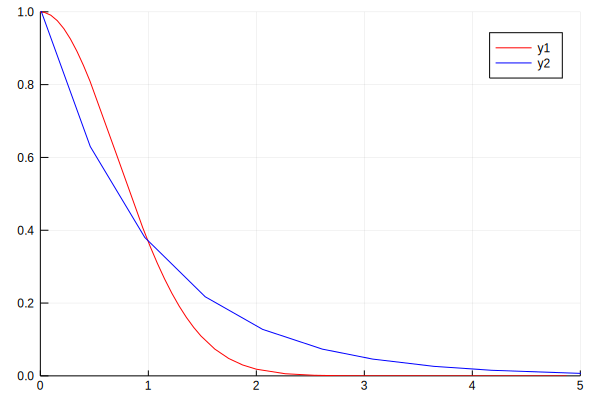

In [740]:
f3(x)=exp(-(x^2))
f4(x)=exp(-x)
plot(f3(x),color="red")
plot!(f4(x),ylimits=(0,1),xlimits=(0,5),color="blue")

In [741]:
#(iii)

Así, podemos encontrar las cotas de la funcion error cuando $\lim_{x \to \infty}$. Si hacemos $t=0$ en la integral $\int_{t=0}^\infty e^{x^2} \le \int_{t=0}^\infty e^{-x} =-e^{-x}\bracevert_{t=0}^\infty=e^{0}=1.$ Nuestra respuesta coincide con el comportamiento de la funcion error que observamos en el inciso uno.

#### Ejercicio 3

(i) Para funciones $f$ que no sean monótonas, ¿qué necesitaríamos poder hacer para encontrar cotas inferiores y superiores para $\int_a^b f$? [Esto es bastante más difícil. Se puede lograr utilizando la **aritmética de intervalos**, por ejemplo.]

(i) Después de una recta horizontal, ¿cuál es la siguiente forma más natural de aproximar a la función $f$ adentro de un intervalo dado? ¿A qué aproximación de la integral lleva, expresada en la forma de la ecuación (*)? Grafícalo.  Este método se llama el **método del trapecio**.

(ii) Impleméntalo. Nota que este método funciona para *cualquier* función $f$, sin que tenga que ser monótona. 
(iii) Aplícalo a algunas funciones cuyas integrales conoces y encuentra la 
tasa de convergencia. ¿Cómo se compara con el método de la pregunta [1]?

In [742]:
#(i)

Dividir a la función en subintervalos mońotonos, y aplicar el método por casos.

In [743]:
#(ii)

La forma más natural de aproximar a una función $f$ no monótona dentro de un intervalo $[a,b]$ (después de una recta horizontal) es una recta entre los puntos $(a,f(a))$ y $(b,f(b))$  

Nos lleva a la siguiente aproximacion de la $$\int_a^b f=\frac{Q_{sup}+Q_{inf}}{2}= \sum_{i=0}^{N-1}\frac{\alpha \, (f(x_{i+1})+f(x_i))}{2}$$

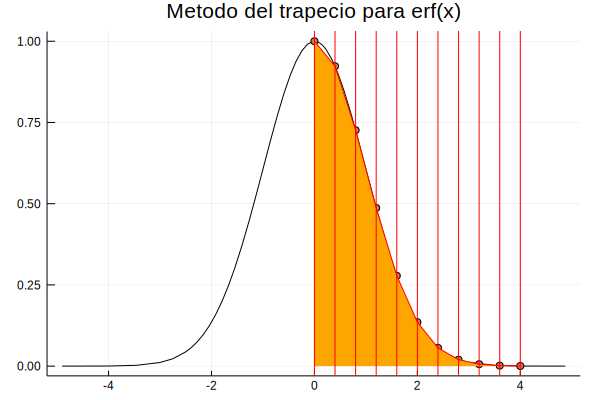

In [744]:
A1,C1,T1,T11=div(4,10) #funcion del 0 al 4, en 10 intervalos
plot(f(x),color="black",legend=false,title="Metodo del trapecio para erf(x)")
scatter!(A1,C1)
plot!(A1,C1,color="red",fill=(0, :orange))
#scatter!(T,T1,marker=:hline,markersize=10,markercolor="green")
vline!(A1,linestyle=:solid,color="red")

In [745]:
#(iii)

In [746]:
#Implemenando el metodo
function trap(f,a,b,n)
    α=(b-a)/n
    s=0
    for i in range(0,n)
        s=s+α*(f(a+(i*α))+f(a+((i+1)*α)))*0.5
    end
    return s
end
g(x)=x
trap(g,0,2,10)#mejor que con las sumas superiores e inferiores.

2.0000000000000004

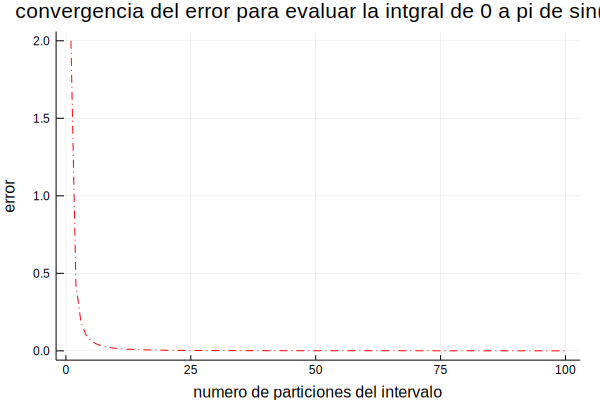

In [747]:
#uilizandolo para integrales que ya conozco
g1(x)=sin(x)
BT=[]
BU=[]
BV=[]
for i in 1:1:100
    d=abs(2-trap(g1,0,pi,i))#el resultado de la integral de sin(x) de 0 a pi
    push!(BT,d)
    push!(BU,i)
end
plot(BU,BT,linestyle=:dashdot,color="red",xlabel="numero de particiones del intervalo",ylabel="error",legend=false,title="convergencia del error para evaluar la intgral de 0 a pi de sin(x)")


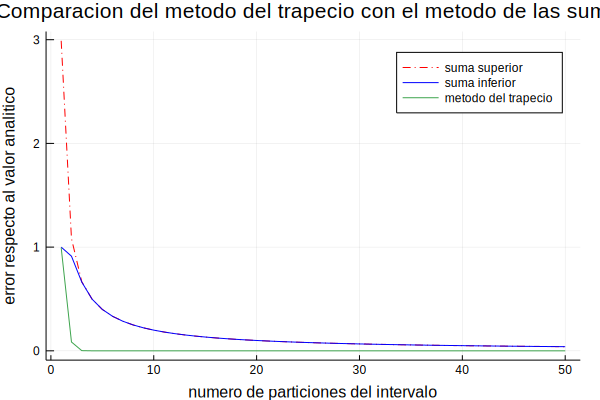

In [748]:
#encontrando el orden de convergencia.
using SpecialFunctions
erf(5)
f(x)=exp(-(x^2)/2)
BT=[]
BU=[]
BV=[]
BW=[]
for i in 1:50
    d=abs(erf(5)-sumasup(f,0,5,i)*(2/sqrt(2*pi)))
    d2=abs(erf(5)-sumainf(f,0,5,i)*(2/sqrt(2*pi)))
    d3=abs(erf(5)-trap(f,0,5,i)*(2/sqrt(2*pi)))
    push!(BT,d)
    push!(BU,i)
    push!(BV,d2)
    push!(BW,d3)
end
plot(BU,BT,linestyle=:dashdot,color="red",label="suma superior",xlabel="numero de particiones del intervalo")
plot!(BU,BV,linestyle=:solid,color="blue",label="suma inferior",ylabel="error respecto al valor analitico")
plot!(BU,BW,label="metodo del trapecio",title="Comparacion del metodo del trapecio con el metodo de las sumas")

Observamos que el metodo del trapecio converge en menos particiones al valor analitico. Tambien es mu conveniente que nuestra funcion no tenga que ser necesariamente monotona.

#### Ejercicio 4

Lo que estamos haciendo es aproximar la función $f$ en cada sub-intervalo. La siguiente aproximación es una cuadrática, la cual lleva a una regla llamada el **método de Simpson**.

(i) Utiliza el método de interpolación de Lagrange para encontrar una expresión analítica para un polinomio que interpola la función $f$ en tres puntos: $x_i$, $x_{i+1}$, y el punto medio $m$ entre $x_i$ y $x_{i+1}$.

(ii) Integra este polinomio para encontrar $\int_{x_i}^{x_{i+1}} f(t) \, dt$. 

(iii) Así, encuentra una aproximación para $\int_{a}^{b} f(t) \, dt$.

(iv) Encuentra numéricamente la tasa de convergencia del método.

In [749]:
#(i)

Llamare $a$ a $x_{i}$, $b$ a $x_{i+1}$ y m al punto medio. Utilizando interpolacion de Lagrange obtenemos lo siguiente, $$$$$$P_{2}(x)=f(a)\dfrac{(x-m)(x-b)}{(a-m)(a-b)}+f(m)\dfrac{(x-a)(x-b)}{(m-a)(m-b)}+f(b)\dfrac{(x-m)(x-a)}{(b-a)(b-m)}. $$ 

In [750]:
#(ii)

Si integramos este polinomio obtenemos, $$\int_{a}^{b} P_{2}(x)= \frac{h}{3}f(x_{0})+\frac{4 h}{3}f(x_{1})+\frac{h}{3}f(x_{2}).$$ con $h=\dfrac{b-a}{2}.$

In [751]:
#(iii)

Por lo tanto, una buena aproximacion para la integral que buscamos seria la siguiente: $$$$$$\int_{a}^{b}f(x)\ dx= \dfrac{b-a}{6}\Big[\  f(a)+4f(m)+f(b)\Big] $$

In [752]:
f(x)=x^2+x+6 #verificar
a=integrate(f(x),(x,0,783))
function simps(f,a,b)
    m=(a+b)/2
    k=(b-a)/6
    z=k*(f(a)+(4*f(m))+f(b))
    return z
end
simps(f,0,783)

1.603274715e8

Se puede mejorar el metodo implementandolo de la siguiente manera: $$\int_a^b P(x)dx=\frac{\Delta x}{3}[f(x_0)+4f(x_1)+2f(x_{2})+4(fx_3)+\ldots+4f(x_{n-1})+f(x_n)]$$

In [753]:
#implementando el metodo
function simpsb(f,a,b,n)
    Δx=(b-a)/n
    s=(Δx/3)*f(a)
    for i in range(1,n)
        if i%2!=0
            s=s+(Δx/3)*4*f(a+(i*Δx))
        else 
             s=s+(Δx/3)*2*f(a+(i*Δx))
        end
    end
    return s
end

simpsb (generic function with 1 method)

In [754]:
#Comprobando el metodo para la integral de sin(x) de 0 a pi.

In [755]:
g(x)=sin(x)
simpsb(g,0,pi,10)

2.0001095173150043

In [756]:
simps(g,0,pi)

2.0943951023931953

In [757]:
trap(g,0,pi,10)

1.9835235375094546

In [758]:
sumainf(g,0,pi,10)

1.9835235375094544

El mejor resultado lo dio el metodo de simpson mejorado. 😺

In [759]:
#tasa de convergencia del metodo

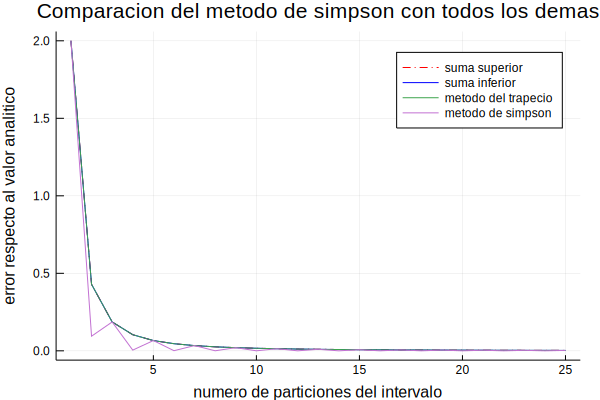

In [760]:
BT=[]
BU=[]
BV=[]
BW=[]
BX=[]
for i in 1:25
    d=abs(2-sumasup(g,0,pi,i))
    d2=abs(2-sumainf(g,0,pi,i))
    d3=abs(2-trap(g,0,pi,i))
    d4=abs(2-simpsb(g,0,pi,i))
    push!(BT,d)
    push!(BU,i)
    push!(BV,d2)
    push!(BW,d3)
    push!(BX,d4)
end
plot(BU,BT,linestyle=:dashdot,color="red",label="suma superior",xlabel="numero de particiones del intervalo")
plot!(BU,BV,linestyle=:solid,color="blue",label="suma inferior",ylabel="error respecto al valor analitico")
plot!(BU,BW,label="metodo del trapecio",title="Comparacion del metodo de simpson con todos los demas",label="metodo del trapecio")
plot!(BU,BX,label="metodo de simpson")

## Métodos más avanzados 

Hay métodos muy precisos, por ejemplo la llamada **cuadratura de Gauss**, que funcionan si la función es suave. En estos métodos, se puede utilizar la interpolación de Lagrange para aproximar una función con un polinomio *globalmente* en todo el rango $[a,b]$, y luego ¡se integra el polinomio! La dificultad es en escoger dónde deberían ser los nodos $x_i$.

[¡Esto podría ser un proyecto final interesante!]

Estos métodos se pueden extender a integrales en más dimensiones.